In [4]:
def get_spectrum(filename, startpixel, endpixel, outputfile = None):
    try:
        img = imageio.imread(filename)
    except:
        print("error image reading")
    if img.shape == (640, 480, 3):                  #for RGB bmp file (wihth blue/red lines)
        tmp = img[startpixel:endpixel, :, 0]        #assuming 3 channels are equal ,(so I'm only usi>
    else:
        tmp = img[startpixel:endpixel, :]           #for mono bmp file (without blue/red lines)
    tmp = np.mean(tmp, 0)
    if outputfile != None:
        np.savetxt(outputfile, tmp, delimiter=',')
        print('saved as \"', outputfile, '\"')
    return tmp

In [3]:
import imageio,np
import matplotlib.pyplot as plt

In [7]:
x = "2019-12-21/11h_ザルディbad/20191221_113100.png"

In [8]:
a = get_spectrum(x, 23, 42)

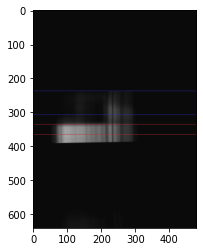

In [13]:
plt.imshow((imageio.imread(x)/255-5.5/255))

In [14]:
z = imageio.imread(x)

In [26]:
id = (z<=16)
print(id, id.shape)
zz = z - 5.5
zz[id] = 0

[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 ...

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]] (640, 480, 3)


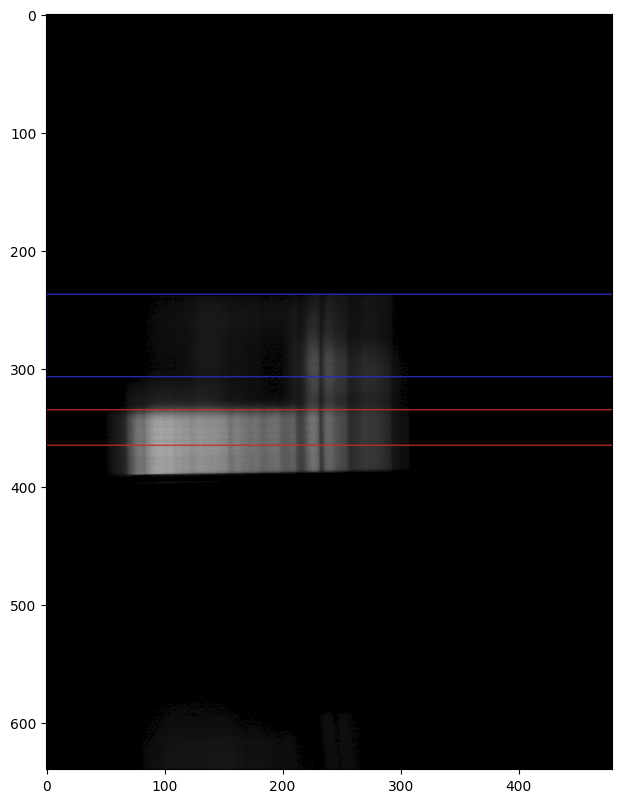

In [32]:
fig=plt.figure(figsize=(20,10), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(zz/255)

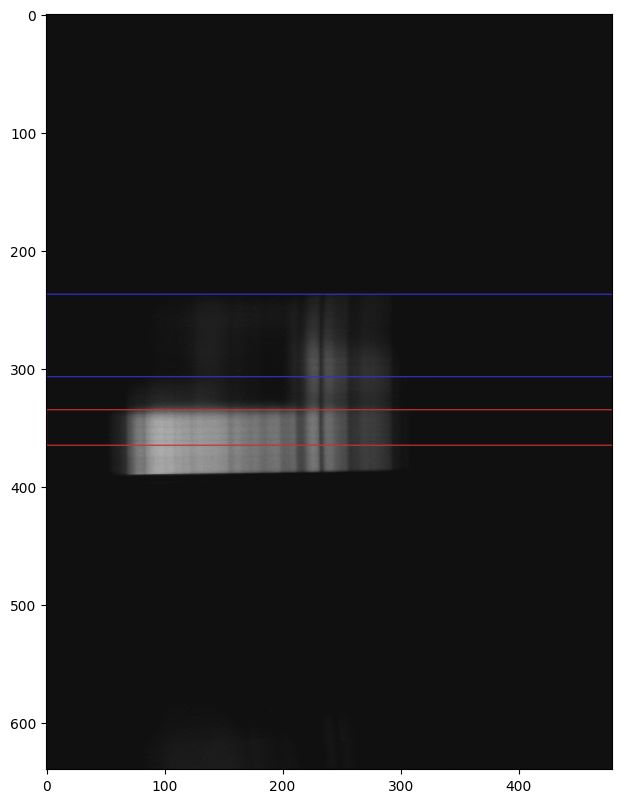

In [35]:
zz.shape


(640, 480, 3)

In [65]:
zz_extended = np.zeros((640, 480+60, 1))
zz_extended[:,30:480+30,0] = zz[:,:,0]

asdf = np.zeros((639,1))
x1   = np.zeros((639,480))
y2   = np.zeros((1,480+60))
y2[0,30:480+30] = 1

for i in range(640-1):
    curD = 0
    initialDiff = np.sum(abs(zz_extended[i,30:480+30,0] - zz_extended[i+1,30:480+30,0])) 
    for j in range(-30,30, 1):
        tmp = np.sum(abs(zz_extended[i,30:480+30,0] - zz_extended[i+1,30+j:480+30+j,0]))
        if initialDiff > tmp:
            curD = j
            initialDiff = tmp
    asdf[i] = curD
    x1[i,:] = zz_extended[i+1,30+curD:480+30+curD,0]

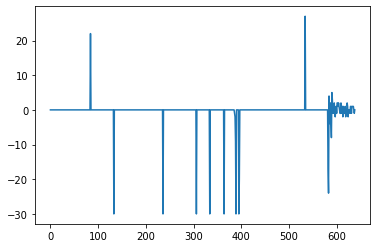

In [66]:
plt.plot(asdf)

In [67]:
np.sum(abs(zz_extended[i,30:480+30,0] - zz_extended[i+1,30+j:480+30+j,0]))

1745.5

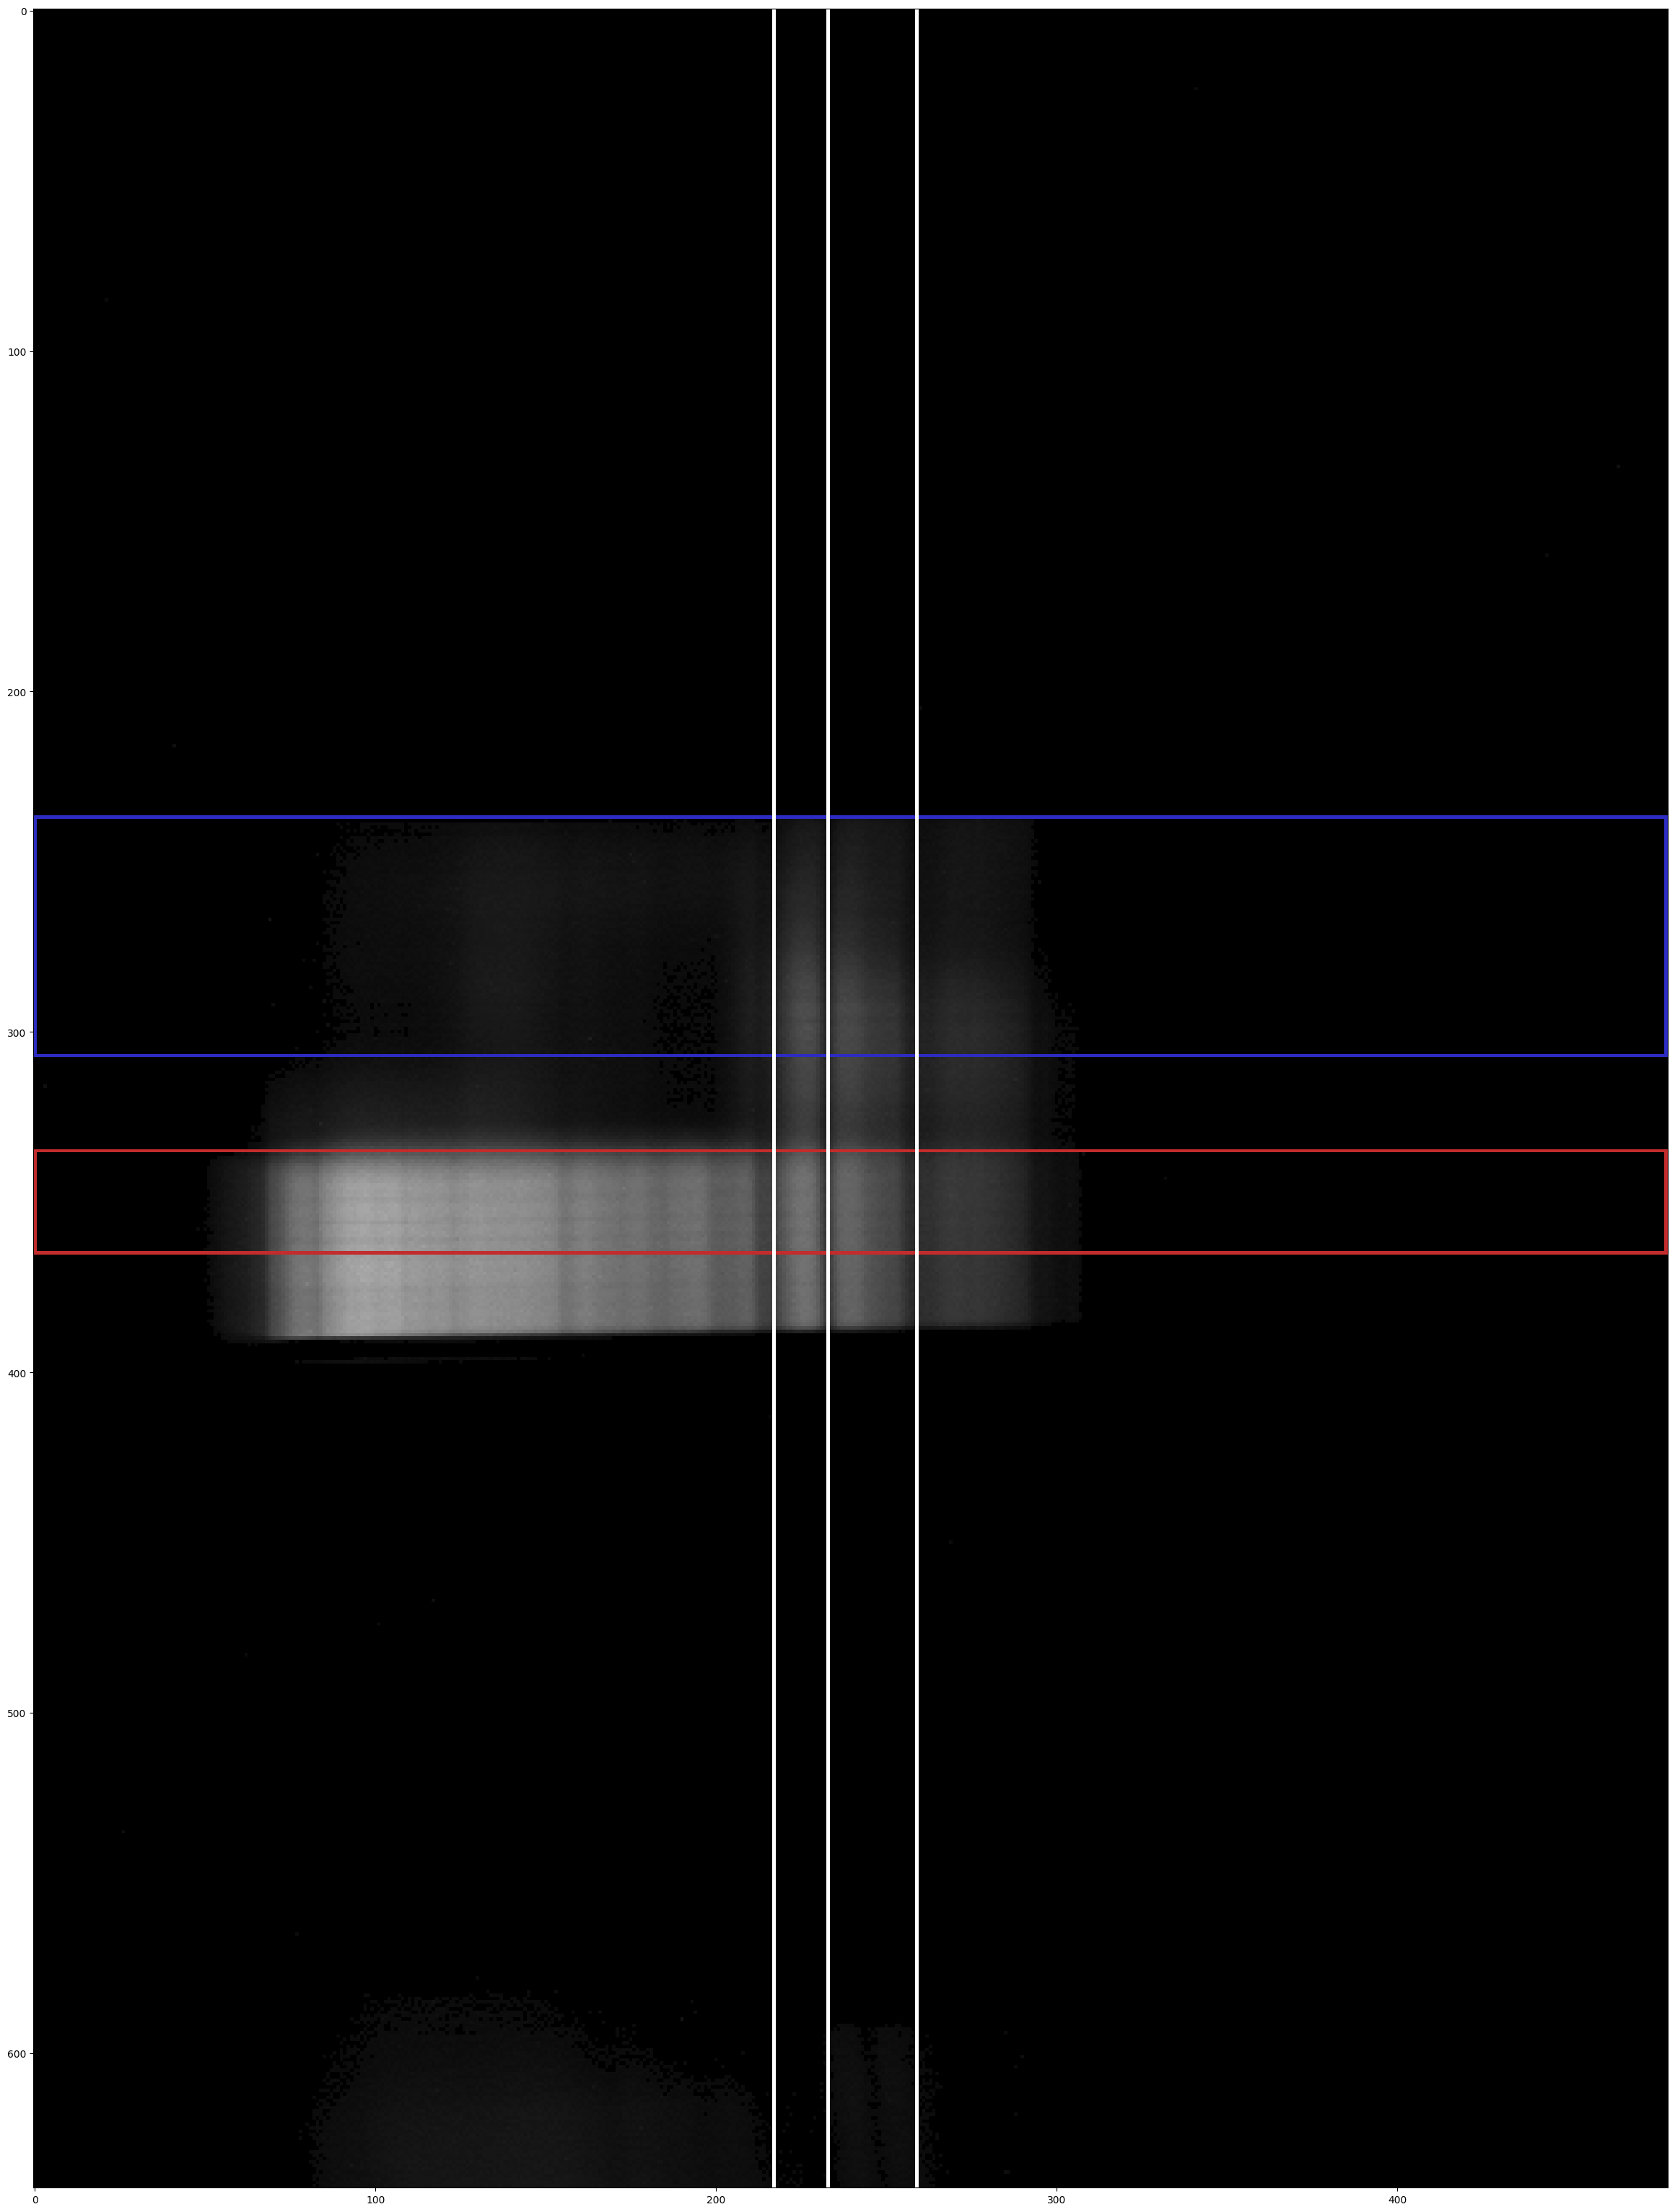

In [86]:
fig=plt.figure(figsize=(30,40), dpi= 100, facecolor='w', edgecolor='k')
asd = zz/255
asd[:,233,:]=1
asd[:,259,:]=1
asd[:,217,:]=1
plt.imshow(asd)

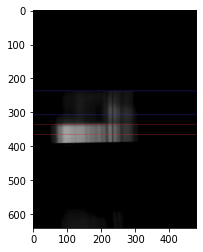

In [70]:
plt.imshow()